# Expanded EDA

## AI Impacts on Industries/Roles

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("cleaned_data.csv")

df["AI Impact"] = df["AI Impact"].str.replace("%", "").astype(float)

df["Log Salary"] = np.log1p(df["Average Normalized Salary"])

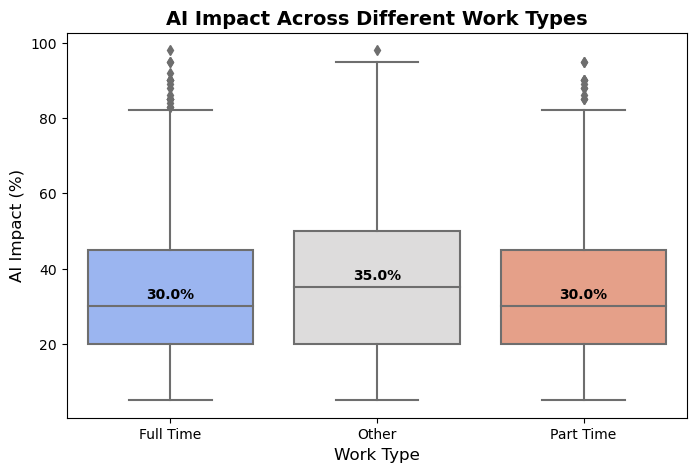

In [ ]:
# boxplot of AI impact across work types
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x=df["Work Type"], y=df["AI Impact"], palette="coolwarm")
medians = df.groupby("Work Type")["AI Impact"].median()
for i, median in enumerate(medians):
    ax.text(i, median + 2, f"{median:.1f}%", ha='center', fontsize=10, fontweight='bold', color="black")
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("AI Impact (%)", fontsize=12)
plt.title("AI Impact Across Different Work Types", fontsize=14, fontweight='bold')
plt.show()

IQR is similar for all work types, the "other" work type has slightly higher median AI impact score and all work types have outliers with AI Impact above 80%. This result suggests all work types have generally the same susceptiibility to AI automating their work. AI impact is not determined based on work type.

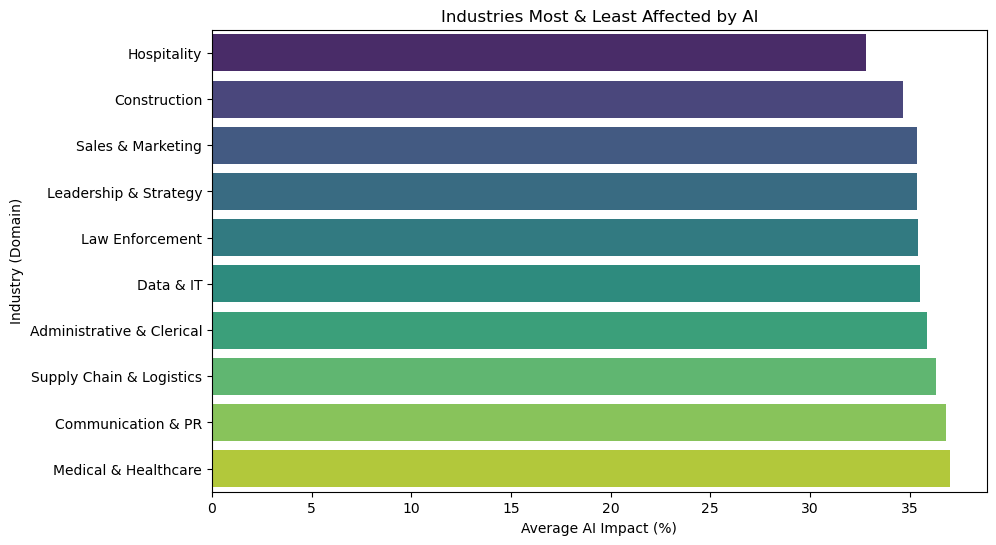

In [4]:
# average AI impact by industry
ai_impact_by_domain = df.groupby("Domain")["AI Impact"].mean().sort_values()

# AI impact by industry
plt.figure(figsize=(10, 6))
sns.barplot(y=ai_impact_by_domain.index, x=ai_impact_by_domain.values, palette="viridis")
plt.xlabel("Average AI Impact (%)")
plt.ylabel("Industry (Domain)")
plt.title("Industries Most & Least Affected by AI")
plt.show()


Based on this visualization we see that no industry is completely free of AI automation, but the three industries with the highest Average AI Impact (%) are Medical/Healthcare, Communications/PR, and Supply Chain & Logistics. This likely due to the abudnance of administrative tasks commonly seen with roles in these industries. While Hospitality, Construction, and Sales/Marketing see the lowest impact of AI. These are more human-centric industries where there is less technical administrative tasks and see more physical labor/person-person communication focused. Below, you'll see further analysis digging into the top 3 most impacted industries and the highest/lowest affected roles for each.

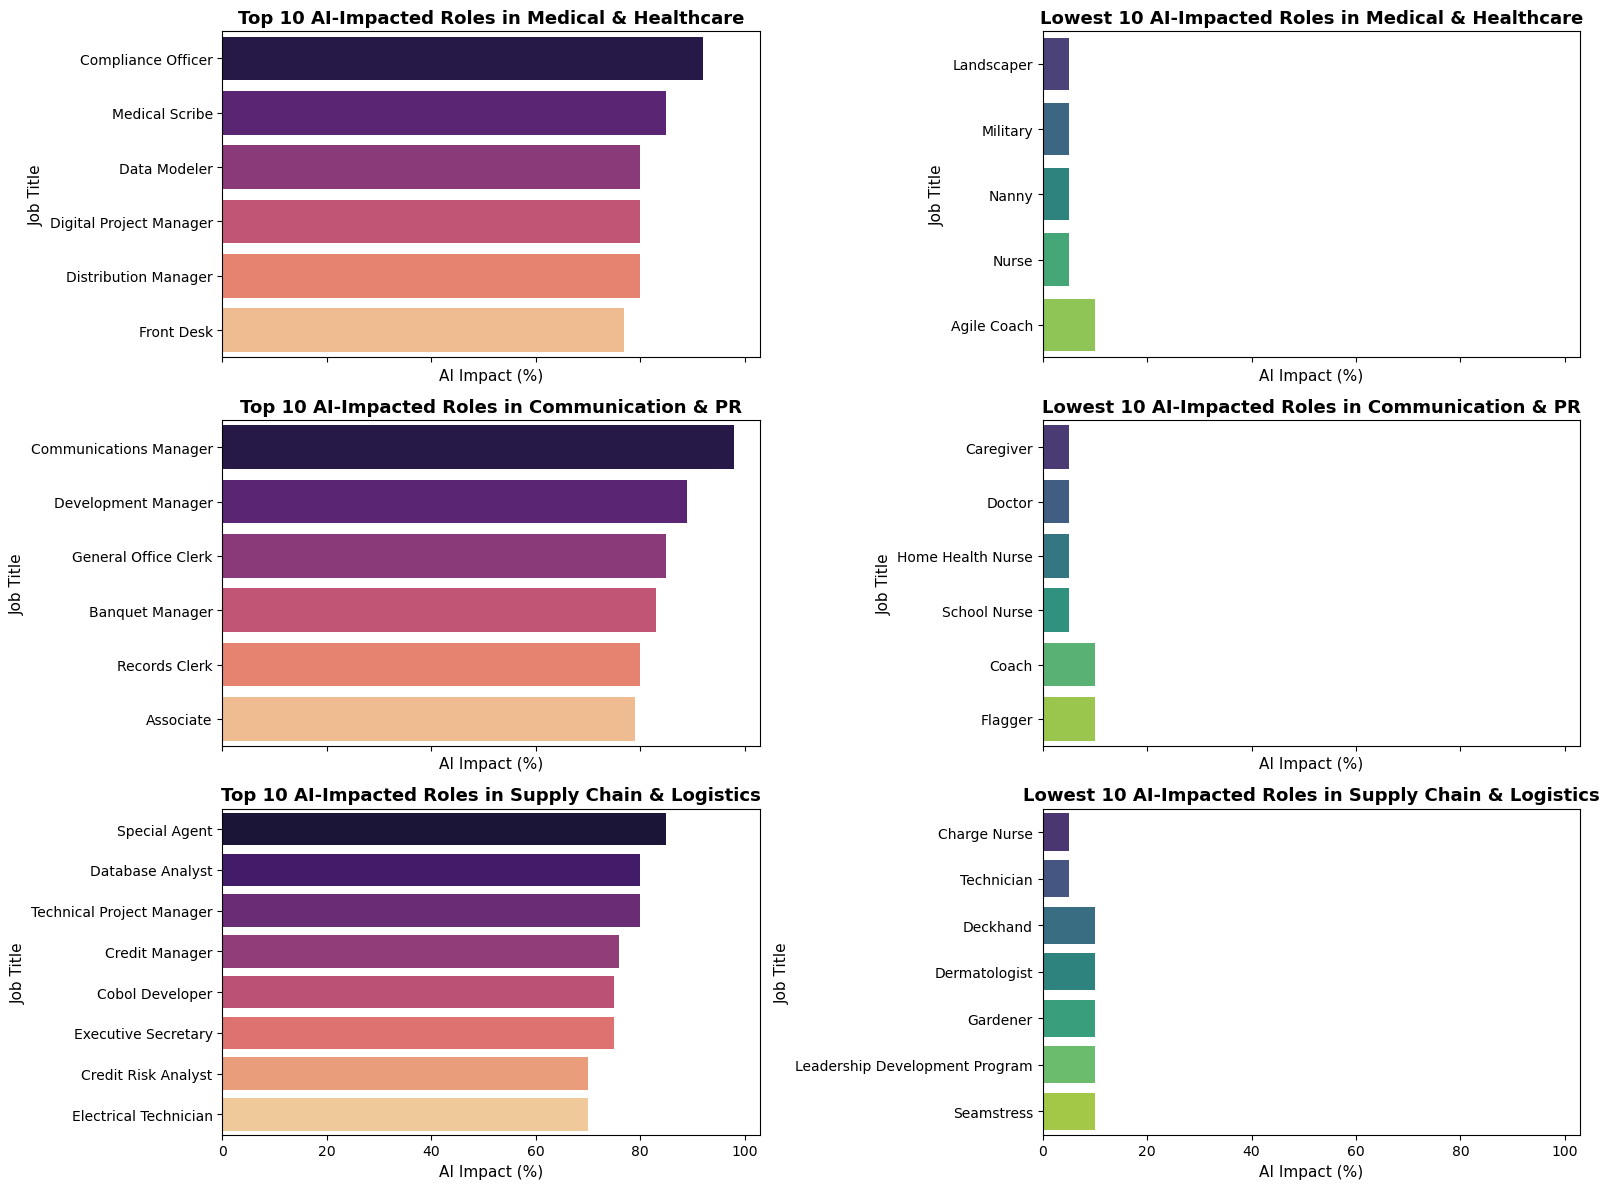

In [ ]:
top_industries = df.groupby("Domain")["AI Impact"].mean().nlargest(3).index.tolist()

fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True)

for i, industry in enumerate(top_industries):
    industry_df = df[df["Domain"] == industry]

    top_roles = industry_df.nlargest(10, "AI Impact")[["Job Title", "AI Impact"]]
    sns.barplot(y=top_roles["Job Title"], x=top_roles["AI Impact"], palette="magma", ax=axes[i, 0])
    axes[i, 0].set_title(f"Top 10 AI-Impacted Roles in {industry}", fontsize=13, fontweight='bold')
    axes[i, 0].set_xlabel("AI Impact (%)", fontsize=11)
    axes[i, 0].set_ylabel("Job Title", fontsize=11)
    
    bottom_roles = industry_df.nsmallest(10, "AI Impact")[["Job Title", "AI Impact"]]
    sns.barplot(y=bottom_roles["Job Title"], x=bottom_roles["AI Impact"], palette="viridis", ax=axes[i, 1])
    axes[i, 1].set_title(f"Lowest 10 AI-Impacted Roles in {industry}", fontsize=13, fontweight='bold')
    axes[i, 1].set_xlabel("AI Impact (%)", fontsize=11)
    axes[i, 1].set_ylabel("Job Title", fontsize=11)

plt.tight_layout()
plt.show()


These visualizations confirm the assumption that it is the more human-centric roles that require physical labor and human communication that are safest from AI automation, while the more technical/administrative/routine roles are more impacted.

## AI Impact on Salaries

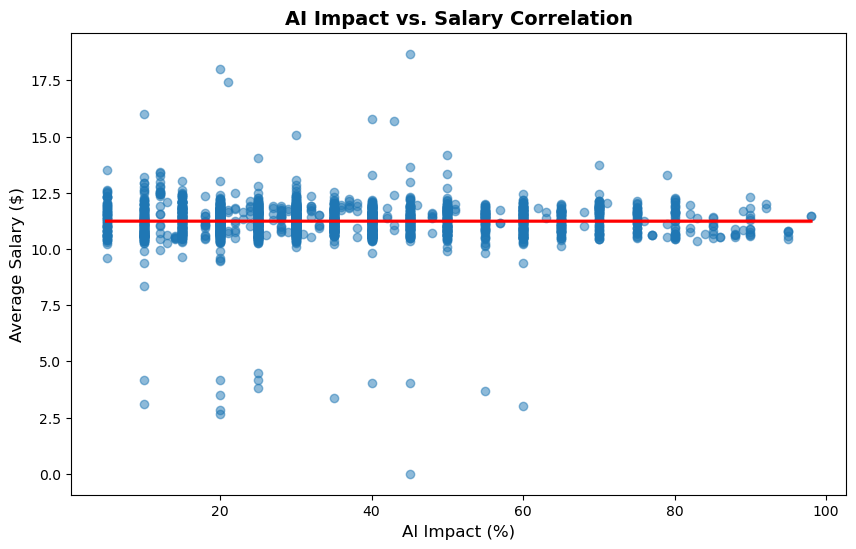

In [ ]:
# scatter plot
df["Log Salary"] = np.log1p(df["Average Normalized Salary"])
plt.figure(figsize=(10, 6))
sns.regplot(x=df["AI Impact"], y=df["Log Salary"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("AI Impact (%)", fontsize=12)
plt.ylabel("Average Salary ($)", fontsize=12)
plt.title("AI Impact vs. Salary Correlation", fontsize=14, fontweight='bold')
plt.show()


Based on the above scatterplot, it appears as though AI impact alone has little to no affect on average salary. Each data point is a job and all jobs fall along the same salary level with a flat trendline indicating no linear relationship between AI impact (%) and average salary. This may also be indicative of faulty/incorrect data.

/Users/loganhahn/anaconda3/lib/python3.10/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/loganhahn/anaconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/Users/loganhahn/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


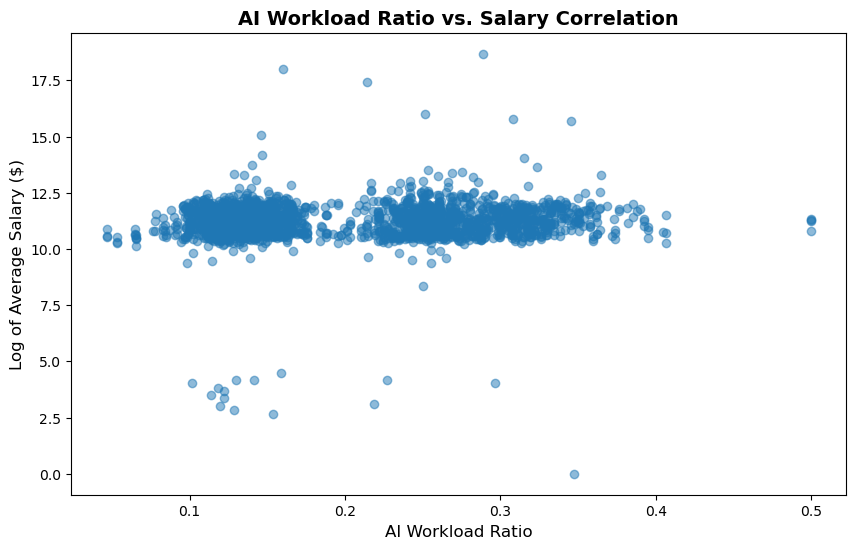

In [ ]:
# scatter plot for AI workload ratio vs. salary
plt.figure(figsize=(10, 6))
sns.regplot(x=df["AI Workload Ratio"], y=df["Log Salary"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Improve labeling and title
plt.xlabel("AI Workload Ratio", fontsize=12)
plt.ylabel("Log of Average Salary ($)", fontsize=12)
plt.title("AI Workload Ratio vs. Salary Correlation", fontsize=14, fontweight='bold')

# Show plot
plt.show()


/Users/loganhahn/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/loganhahn/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/loganhahn/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

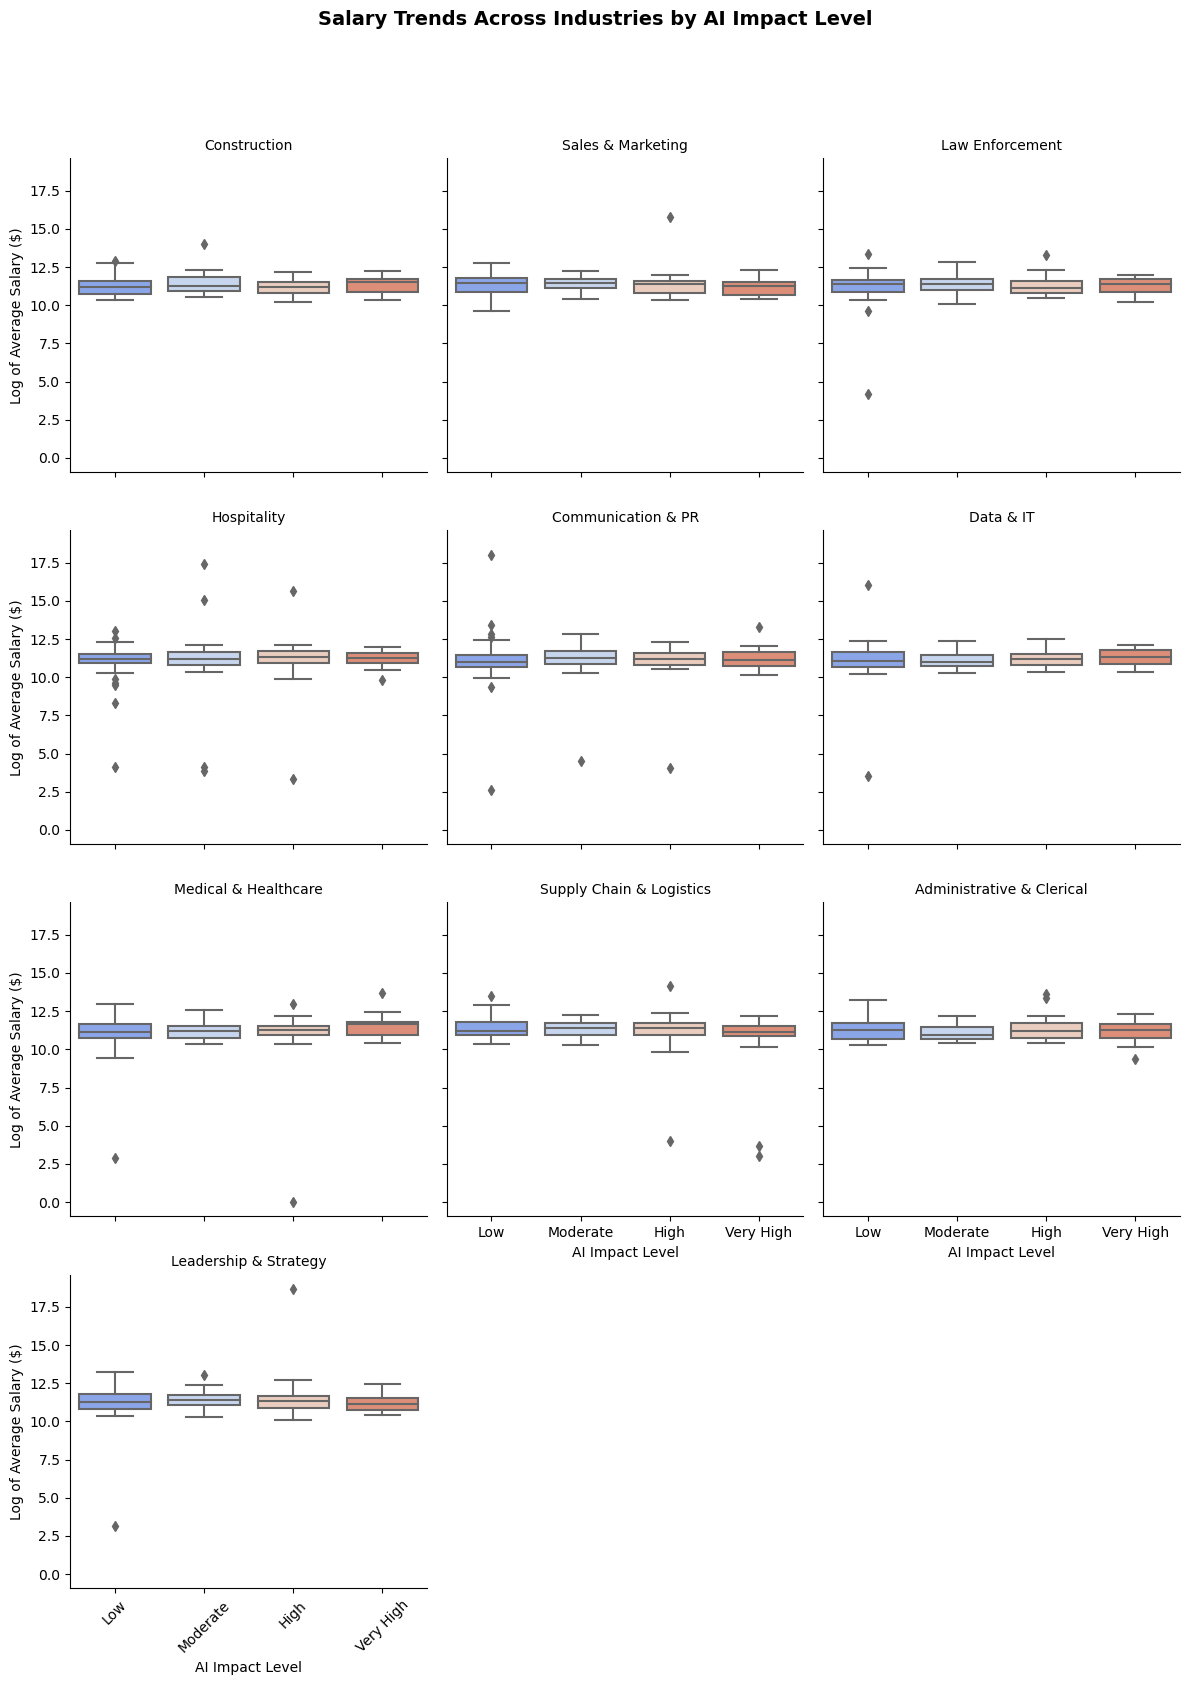

In [ ]:
df["AI Impact Level"] = pd.qcut(df["AI Impact"], q=4, labels=["Low", "Moderate", "High", "Very High"])

# Industry-specific salary trends
g = sns.FacetGrid(df, col="Domain", col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.boxplot, x="AI Impact Level", y="Log Salary", palette="coolwarm", order=["Low", "Moderate", "High", "Very High"])
g.set_axis_labels("AI Impact Level", "Log of Average Salary ($)")
g.set_titles("{col_name}")
plt.suptitle("Salary Trends Across Industries by AI Impact Level", fontsize=14, fontweight='bold', y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the several varying types of analysis above, we can see that with the exception of a few major outliers, salary across all roles in all industries don't seem to have any relationship with AI impact. These analyses were done several ways to account for varying salaries and outliers, logarithmic normalization as well as excluding salaries above the 99th percentile, neither techniques altered the results in any way.

## Job availability/Hiring Trends

/Users/loganhahn/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


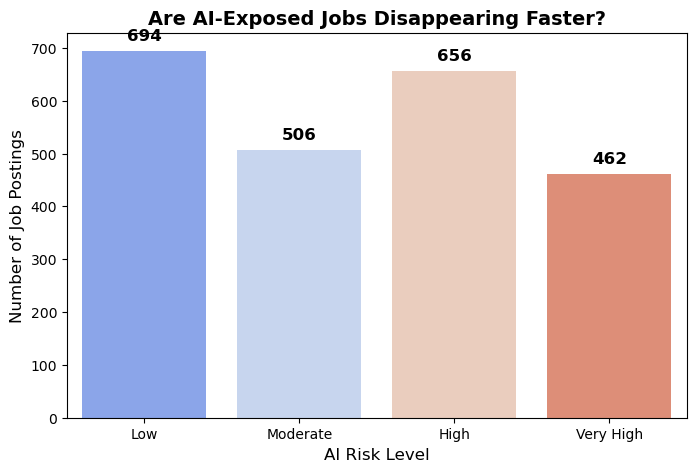

In [35]:
df["AI Risk Level"] = pd.qcut(df["AI Impact"], q=4, labels=["Low", "Moderate", "High", "Very High"])

job_counts = df["AI Risk Level"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=job_counts.index, y=job_counts.values, palette="coolwarm")
for i, count in enumerate(job_counts.values):
    ax.text(i, count + 20, str(count), ha='center', fontsize=12, fontweight='bold')
plt.xlabel("AI Risk Level", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.title("Are AI-Exposed Jobs Disappearing Faster?", fontsize=14, fontweight='bold')
plt.show()


This visualization found quartiles of AI impact to categorize job positions into four equally distributed categories based on AI impact. We see that the roles with the highest AI impact had the least job openings on LinkedIn and the roles with the lowest AI impact had the highest number of postings. The moderate and high categories do not follow the base assumption so it's hard to say definitively if there is a strong causality between AI impact and job postings.

Tasks vs. AI models:
There's a significant positive correlation (0.87) between the number of tasks and AI models. This suggests that job titles with more tasks tend to have more AI models associated with them. This could indicate that as the complexity or variety of tasks for a job title increases, there's a higher potential for AI to be implemented in some capacity.

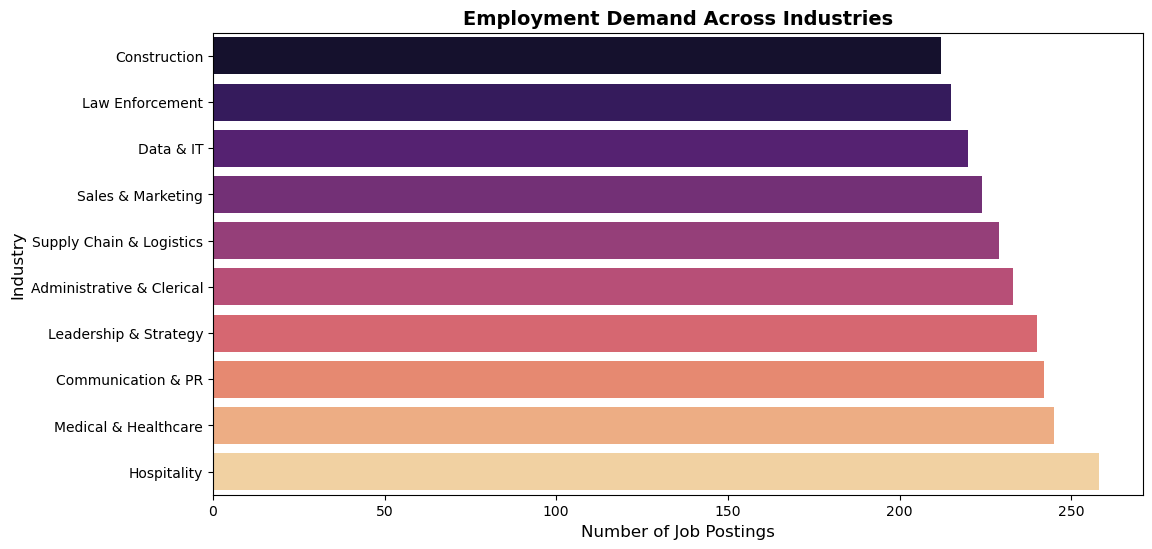

In [ ]:
# counts job postings per industry
industry_counts = df.groupby("Domain")["Job Title"].count().sort_values()

# industry-wise job postings
plt.figure(figsize=(12, 6))
sns.barplot(y=industry_counts.index, x=industry_counts.values, palette="magma")
plt.xlabel("Number of Job Postings", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.title("Employment Demand Across Industries", fontsize=14, fontweight='bold')
plt.show()


The number of available job postings per industry do not appear to follow the assumption of AI Impact on industry as the highest number of postings is in hospitality which is to be expected, but the other industries with the highest number of available job postings are also the industries with the greatest AI impact. It's reasonable to conclude that the number of available job postings on linkedin per industry is reliant on all the many other factors other than AI impact.